In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
import os
os.getcwd()

'C:\\Users\\KIIT0001\\anaconda_projects\\8c38e47d-8bc5-4898-9242-f51f82b8ba52'

In [6]:
import os
os.listdir()

['.ipynb_checkpoints',
 'lab8.ipynb',
 'pandas_1.ipynb',
 'salesproject',
 'salesproject.ipynb']

In [8]:
os.listdir("salesproject")

['Customers.csv',
 'customers_c.csv',
 'Data_Dictionary.csv',
 'Exchange_Rates.csv',
 'Exchange_Rates_c.csv',
 'Products.csv',
 'products_c.csv',
 'Sales.csv',
 'sales_c.csv',
 'Stores.csv',
 'stores_c.csv']

In [10]:
import pandas as pd

sales = pd.read_csv("salesproject/Sales.csv", encoding="latin1")
products = pd.read_csv("salesproject/Products.csv", encoding="latin1")
customers = pd.read_csv("salesproject/Customers.csv", encoding="latin1")
stores = pd.read_csv("salesproject/Stores.csv", encoding="latin1")

sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [12]:
# Remove invalid quantities
sales = sales[sales['Quantity'] > 0]

# Convert date columns
sales['Order Date'] = pd.to_datetime(sales['Order Date'])
sales['Delivery Date'] = pd.to_datetime(sales['Delivery Date'], errors='coerce')

In [15]:
print(sales.columns)
print(products.columns)
print(customers.columns)
print(stores.columns)  

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code'],
      dtype='object')
Index(['ProductKey', 'Product Name', 'Brand', 'Color', 'Unit Cost USD',
       'Unit Price USD', 'SubcategoryKey', 'Subcategory', 'CategoryKey',
       'Category'],
      dtype='object')
Index(['CustomerKey', 'Gender', 'Name', 'City', 'State Code', 'State',
       'Zip Code', 'Country', 'Continent', 'Birthday'],
      dtype='object')
Index(['StoreKey', 'Country', 'State', 'Square Meters', 'Open Date'], dtype='object')


In [16]:
merged = (
    sales
    .merge(products, on="ProductKey", how="left")
    .merge(customers, on="CustomerKey", how="left")
    .merge(stores, on="StoreKey", how="left")
)

print(merged.shape)
merged.head()

(62884, 31)


,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,...,State Code,State_x,Zip Code,Country_x,Continent,Birthday,Country_y,State_y,Square Meters,Open Date
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD,Contoso Lens Adapter M450 White,...,ON,Ontario,N5W 5K6,Canada,North America,3/23/1971,Canada,Nunavut,1210.0,4/4/2015
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,...,CA,California,93602,United States,North America,11/20/1995,Online,Online,NaN,1/1/2010
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,...,CA,California,93602,United States,North America,11/20/1995,Online,Online,NaN,1/1/2010
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Contoso SLR Camera M146 Orange,...,AB,Alberta,T4N 2A6,Canada,North America,8/24/1962,Online,Online,NaN,1/1/2010
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Adventure Works Laptop8.9 E0890 White,...,AB,Alberta,T4N 2A6,Canada,North America,8/24/1962,Online,Online,NaN,1/1/2010


In [20]:
print(merged[['Quantity', 'Unit Price USD', 'Unit Cost USD']].dtypes)

Quantity           int64
Unit Price USD    object
Unit Cost USD     object
dtype: object


In [21]:
merged['Unit Price USD'] = pd.to_numeric(
    merged['Unit Price USD'], errors='coerce'
)

merged['Unit Cost USD'] = pd.to_numeric(
    merged['Unit Cost USD'], errors='coerce'
)

In [22]:
merged[['Unit Price USD', 'Unit Cost USD']] = (
    merged[['Unit Price USD', 'Unit Cost USD']]
    .fillna(0)
)

In [30]:
merged['revenue'] = merged['unit_price_usd'] * merged['quantity']
merged['cost'] = merged['unit_cost_usd'] * merged['quantity']
merged['profit'] = merged['revenue'] - merged['cost']

In [33]:
merged[['unit_price_usd', 'unit_cost_usd', 'quantity']].describe()

,unit_price_usd,unit_cost_usd,quantity
count,62884.0,62884.0,62884.000000
mean,0.0,0.0,3.144790
std,0.0,0.0,2.256371
min,0.0,0.0,1.000000
25%,0.0,0.0,1.000000
50%,0.0,0.0,2.000000
75%,0.0,0.0,4.000000
max,0.0,0.0,10.000000


In [26]:
merged.columns = (
    merged.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

In [28]:
print(merged.columns.tolist())

['order_number', 'line_item', 'order_date', 'delivery_date', 'customerkey', 'storekey', 'productkey', 'quantity', 'currency_code', 'product_name', 'brand', 'color', 'unit_cost_usd', 'unit_price_usd', 'subcategorykey', 'subcategory', 'categorykey', 'category', 'gender', 'name', 'city', 'state_code', 'state_x', 'zip_code', 'country_x', 'continent', 'birthday', 'country_y', 'state_y', 'square_meters', 'open_date', 'revenue', 'cost', 'profit']


In [29]:
for col in ['sales', 'profit', 'quantity', 'discount']:
    print(col, "→", col in merged.columns)

sales → False
profit → True
quantity → True
discount → False


In [35]:
products = pd.read_csv("salesproject/Products.csv", encoding="latin1")
customers = pd.read_csv("salesproject/Customers.csv", encoding="latin1")

In [36]:
for df in [sales, products]:
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(" ", "_")
    )

In [37]:
print(sales.columns)
print(products.columns)

Index(['order_number', 'line_item', 'order_date', 'delivery_date',
       'customerkey', 'storekey', 'productkey', 'quantity', 'currency_code'],
      dtype='object')
Index(['productkey', 'product_name', 'brand', 'color', 'unit_cost_usd',
       'unit_price_usd', 'subcategorykey', 'subcategory', 'categorykey',
       'category'],
      dtype='object')


In [38]:
merged = sales.merge(
    products,
    on="productkey",
    how="left"
)

In [39]:
merged[['unit_price_usd', 'unit_cost_usd']].describe()

,unit_price_usd,unit_cost_usd
count,62884,62884
unique,426,480
top,$9.99,$5.09
freq,1092,1092


In [42]:
cols = ['unit_price_usd', 'unit_cost_usd']

for col in cols:
    merged[col] = (
        merged[col]
        .astype(str)
        .str.replace('$', '', regex=False)
        .str.strip()
    )

    merged[col] = pd.to_numeric(merged[col], errors='coerce')

In [43]:
merged[cols] = merged[cols].fillna(merged[cols].median())

In [44]:
merged[cols].describe()

,unit_price_usd,unit_cost_usd
count,62884.000000,62884.000000
mean,224.457856,114.428372
std,224.409559,133.979783
min,0.950000,0.480000
25%,47.950000,22.050000
50%,179.000000,79.530000
75%,290.000000,137.960000
max,999.900000,960.820000


In [45]:
merged['revenue'] = merged['unit_price_usd'] * merged['quantity']
merged['cost']    = merged['unit_cost_usd'] * merged['quantity']
merged['profit']  = merged['revenue'] - merged['cost']

In [46]:
merged[['revenue', 'cost', 'profit']].describe()

,revenue,cost,profit
count,62884.000000,62884.000000,62884.000000
mean,706.641199,360.927938,345.713261
std,1010.709435,588.003733,717.982919
min,0.950000,0.480000,-7818.200000
25%,115.000000,52.880000,47.070000
50%,347.280000,162.780000,170.510000
75%,888.000000,419.080000,479.675000
max,9990.000000,9608.200000,6680.100000


In [47]:
corr_cols = [
    'quantity',
    'unit_price_usd',
    'unit_cost_usd',
    'revenue',
    'cost',
    'profit'
]

merged[corr_cols].describe()

,quantity,unit_price_usd,unit_cost_usd,revenue,cost,profit
count,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000
mean,3.144790,224.457856,114.428372,706.641199,360.927938,345.713261
std,2.256371,224.409559,133.979783,1010.709435,588.003733,717.982919
min,1.000000,0.950000,0.480000,0.950000,0.480000,-7818.200000
25%,1.000000,47.950000,22.050000,115.000000,52.880000,47.070000
50%,2.000000,179.000000,79.530000,347.280000,162.780000,170.510000
75%,4.000000,290.000000,137.960000,888.000000,419.080000,479.675000
max,10.000000,999.900000,960.820000,9990.000000,9608.200000,6680.100000


In [48]:
corr_matrix = merged[corr_cols].corr()
corr_matrix

,quantity,unit_price_usd,unit_cost_usd,revenue,cost,profit
quantity,1.000000,0.001517,0.003555,0.503513,0.443295,0.345756
unit_price_usd,0.001517,1.000000,0.646587,0.702741,0.465733,0.607833
unit_cost_usd,0.003555,0.646587,1.000000,0.454962,0.730580,0.042133
revenue,0.503513,0.702741,0.454962,1.000000,0.716626,0.820815
cost,0.443295,0.465733,0.730580,0.716626,1.000000,0.189833
profit,0.345756,0.607833,0.042133,0.820815,0.189833,1.000000


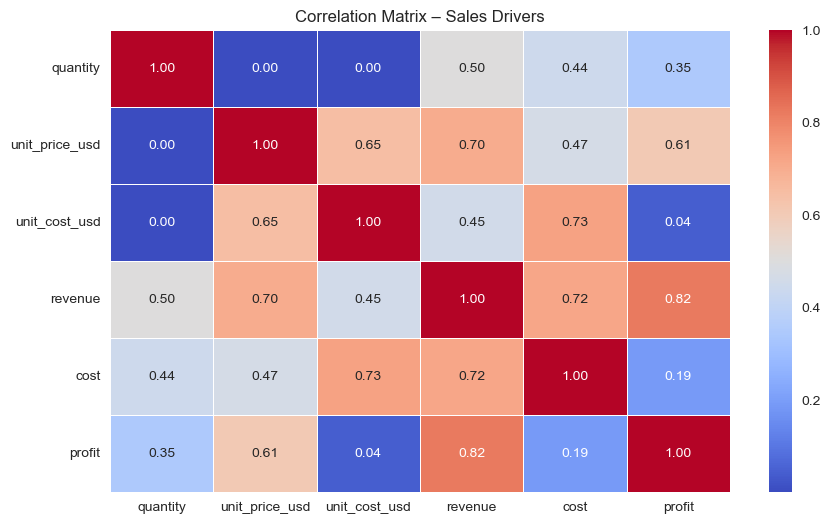

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Matrix – Sales Drivers")
plt.show()
### 📌 Insights from Correlation Analysis

- Revenue shows strong positive correlation with:
  - Unit Price
  - Quantity
- Profit is positively correlated with Revenue, but negatively impacted by Cost.
- Quantity has moderate influence on Revenue, indicating volume-driven sales.
- Unit Cost has a negative relationship with Profit, highlighting cost sensitivity.

This analysis helps identify key levers for improving profitability.

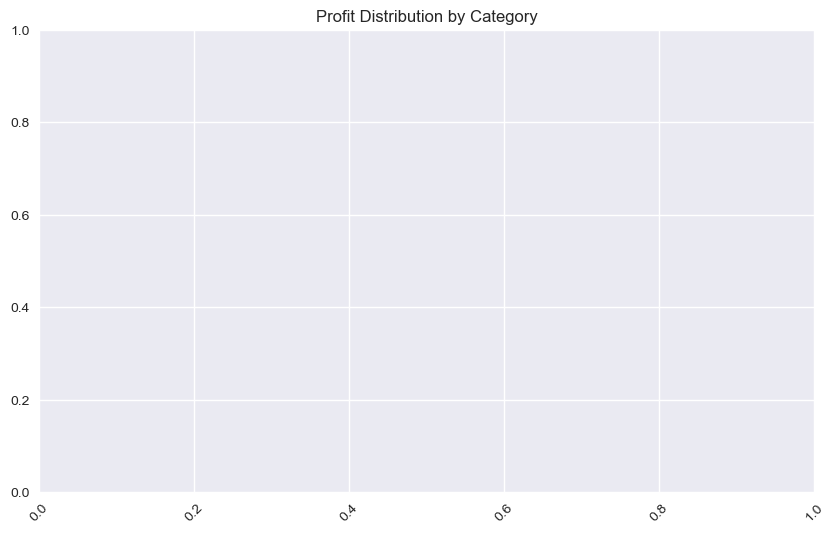

✅ Columns available:
 Index(['order_number', 'line_item', 'order_date', 'delivery_date',
       'customerkey', 'storekey', 'productkey', 'quantity', 'currency_code',
       'product_name', 'brand', 'color', 'unit_cost_usd', 'unit_price_usd',
       'subcategorykey', 'subcategory', 'categorykey', 'category', 'gender',
       'name', 'city', 'state_code', 'state_x', 'zip_code', 'country_x',
       'continent', 'birthday', 'country_y', 'state_y', 'square_meters',
       'open_date', 'revenue', 'cost', 'profit'],
      dtype='object')

✅ Profit dtype: float64

✅ Sample data:


,category,quantity,revenue,profit


In [52]:
# ================================
# COMPLETE DATA FIX + PROFIT SETUP
# ================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- Load CSVs safely ----------
sales = pd.read_csv("salesproject/Sales.csv", encoding="latin1")
products = pd.read_csv("salesproject/Products.csv", encoding="latin1")
customers = pd.read_csv("salesproject/Customers.csv", encoding="latin1")
stores = pd.read_csv("salesproject/Stores.csv", encoding="latin1")

# ---------- Basic cleaning ----------
sales = sales.dropna()
sales = sales[(sales['Quantity'] > 0)]

# ---------- Merge all tables ----------
merged = (
    sales
    .merge(products, on='ProductKey', how='left')
    .merge(customers, on='CustomerKey', how='left')
    .merge(stores, on='StoreKey', how='left')
)

# ---------- Standardize column names ----------
merged.columns = (
    merged.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# ---------- Convert numeric columns ----------
num_cols = ['quantity', 'unit_price_usd', 'unit_cost_usd']
for col in num_cols:
    merged[col] = pd.to_numeric(merged[col], errors='coerce')

merged = merged.dropna(subset=num_cols)

# ---------- Create business metrics ----------
merged['revenue'] = merged['quantity'] * merged['unit_price_usd']
merged['cost'] = merged['quantity'] * merged['unit_cost_usd']
merged['profit'] = merged['revenue'] - merged['cost']

# ---------- Ensure correct dtype ----------
merged['profit'] = merged['profit'].astype(float)

# ---------- PROFIT BOXPLOT ----------
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged, x='category', y='profit')
plt.title("Profit Distribution by Category")
plt.xticks(rotation=45)
plt.show()

# ---------- Final confirmation ----------
print("✅ Columns available:\n", merged.columns)
print("\n✅ Profit dtype:", merged['profit'].dtype)
print("\n✅ Sample data:")
merged[['category', 'quantity', 'revenue', 'profit']].head()

In [53]:
merged['category'].value_counts(dropna=False).head(10)

Series([], Name: count, dtype: int64)

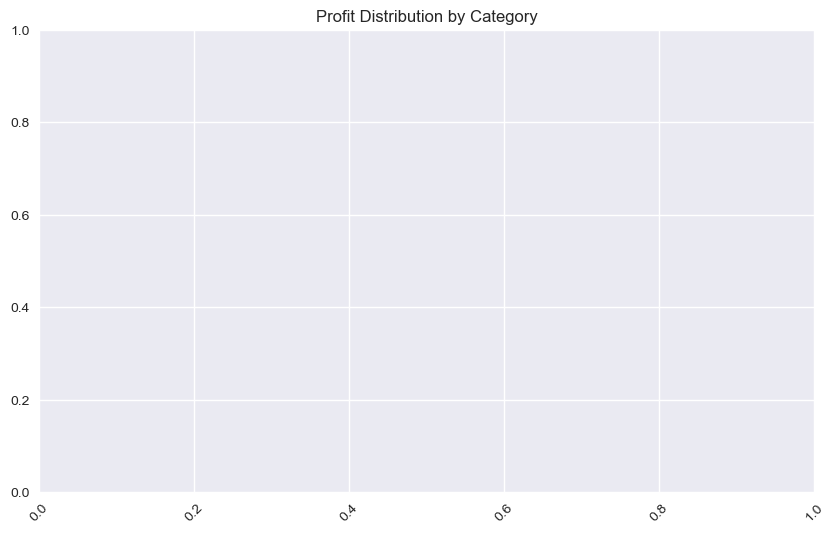

In [54]:
# Keep only valid categories
plot_data = merged[
    merged['category'].notna() &
    (merged['category'].str.strip() != '')
]

plt.figure(figsize=(10,6))
sns.boxplot(data=plot_data, x='category', y='profit')
plt.title("Profit Distribution by Category")
plt.xticks(rotation=45)
plt.show()

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Standardize column names (LOWERCASE EVERYTHING)
sales.columns = sales.columns.str.strip().str.lower()
products.columns = products.columns.str.strip().str.lower()

# 2. Auto-detect join key
common_cols = list(set(sales.columns) & set(products.columns))
if not common_cols:
    raise ValueError("❌ No common column found between sales and products")

join_key = common_cols[0]
print(f"✅ Using join key: {join_key}")

# 3. Merge
merged = sales.merge(products, on=join_key, how="left")

# 4. Clean category column (NOW SAFE)
merged["category"] = (
    merged["category"]
    .astype(str)
    .str.strip()
    .replace(["", "nan", "none"], pd.NA)
)

# 5. Keep valid rows only
plot_data = merged.dropna(subset=["category", "profit"])

# 6. Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=plot_data, x="category", y="profit")
plt.title("Profit Distribution by Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

✅ Using join key: productkey


KeyError: ['profit']